# Import libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv('data/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


we want to work with numpy arrays. so we can preform mathimatical equations on them.
we also want to split the data into training and testing.   

In [69]:
data_array = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
np.random.shuffle(data_array)
print(data_array)

[[ 3  4]
 [ 9 10]
 [ 5  6]
 [ 1  2]
 [ 7  8]]


In [70]:
data = np.array(data)
m, n = data.shape 
np.random.shuffle(data)

# craete train and test data
data_test = data[0:1000].T # 1000 samples for test
Y_test = data_test[0] # label
X_test = data_test[1:n] # data
X_test = X_test / 255. # normalize data data in the train set goes from 0 to 255. so divide by 255 to get the value between 0 and 1

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape # m_train is the number of samples in the train set

In [71]:
Y_train

array([6, 7, 5, ..., 0, 0, 9], dtype=int64)

In [72]:
X_train[:,0].shape

(784,)

In [73]:
# we need to initialize our weights and bias
# crate randon weights and bias for the first and second layer and minus 0.5 to get the value between -0.5 and 0.5
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5 
    return W1, b1, W2, b2

# ReLU activation function
def ReLU(Z):
    return np.maximum(Z, 0)

# softmax activation function
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

# forward propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# derivative of ReLU
def deriv_ReLU(Z):
    return Z > 0

# one hot encoding
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


# back progagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

# update weights and bias
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2
    

In [74]:
# get predictions
def get_predictions(A2):
    return np.argmax(A2, 0)

# get accuracy 
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


# desecent gradient
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("iteration:", i)
            print("accuracy:", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [75]:
# run the model
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

iteration: 0
[0 0 6 ... 6 3 3] [6 7 5 ... 0 0 9]
accuracy: 0.10992682926829268
iteration: 50
[0 5 4 ... 0 0 8] [6 7 5 ... 0 0 9]
accuracy: 0.32565853658536587
iteration: 100
[6 7 3 ... 0 0 4] [6 7 5 ... 0 0 9]
accuracy: 0.6830975609756098
iteration: 150
[6 7 3 ... 0 6 4] [6 7 5 ... 0 0 9]
accuracy: 0.7485853658536585
iteration: 200
[6 7 6 ... 0 0 9] [6 7 5 ... 0 0 9]
accuracy: 0.7965121951219513
iteration: 250
[6 7 6 ... 0 0 9] [6 7 5 ... 0 0 9]
accuracy: 0.8254390243902439
iteration: 300
[6 7 6 ... 0 0 9] [6 7 5 ... 0 0 9]
accuracy: 0.8434390243902439
iteration: 350
[6 7 6 ... 0 0 9] [6 7 5 ... 0 0 9]
accuracy: 0.8545609756097561
iteration: 400
[6 7 6 ... 0 0 9] [6 7 5 ... 0 0 9]
accuracy: 0.862
iteration: 450
[6 7 6 ... 0 0 9] [6 7 5 ... 0 0 9]
accuracy: 0.8648292682926829
iteration: 500
[6 7 6 ... 0 0 9] [6 7 5 ... 0 0 9]
accuracy: 0.869
iteration: 550
[6 7 6 ... 0 0 9] [6 7 5 ... 0 0 9]
accuracy: 0.8753658536585366
iteration: 600
[6 7 6 ... 0 0 9] [6 7 5 ... 0 0 9]
accuracy: 0.8691

accuracy: 0.8765853658536585

In [76]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


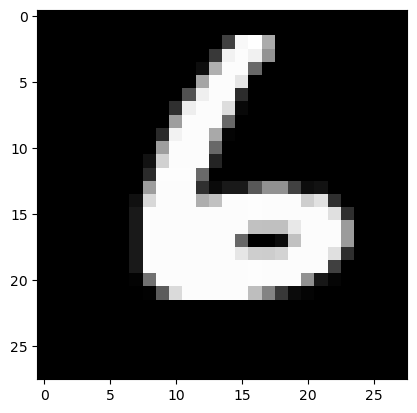

Prediction:  [7]
Label:  7


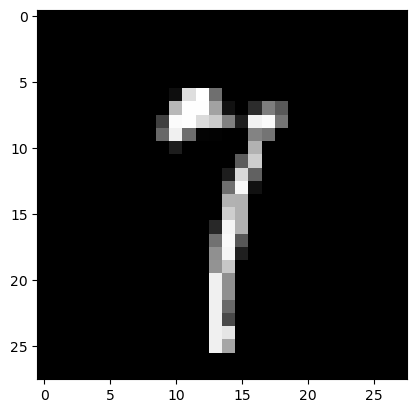

Prediction:  [5]
Label:  5


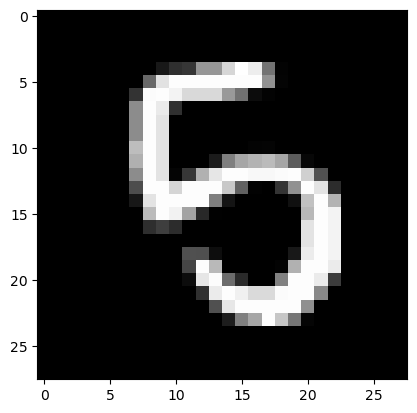

Prediction:  [1]
Label:  1


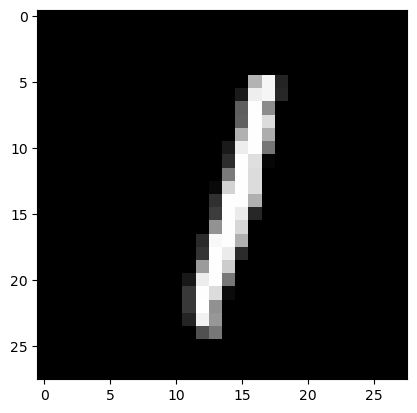

In [77]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [78]:
dev_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_test)

[4 3 3 1 0 5 8 5 2 7 8 6 3 3 8 7 8 8 7 1 2 7 6 0 3 7 1 7 8 5 7 9 1 1 1 9 8
 1 4 0 2 5 0 5 3 2 4 4 1 1 7 3 6 8 7 3 1 6 5 3 7 1 9 9 8 7 8 1 2 3 7 9 3 7
 6 0 8 1 2 6 3 3 7 6 0 6 1 7 4 3 8 2 4 3 6 2 7 6 3 5 2 5 7 6 4 0 6 4 8 1 2
 8 3 3 7 2 5 0 1 6 4 3 8 3 9 8 3 1 9 9 4 3 9 6 0 1 9 8 1 6 1 7 0 7 1 1 4 7
 1 7 1 6 4 4 3 6 3 3 6 7 4 4 6 7 4 3 7 4 9 9 2 1 9 1 7 4 1 9 2 3 2 5 8 2 6
 4 0 1 2 9 5 5 0 1 6 3 6 9 2 0 8 7 0 0 1 9 7 1 7 0 0 7 6 7 8 1 7 0 7 6 7 7
 0 6 9 1 8 0 5 5 0 1 4 7 0 6 0 8 5 5 9 8 4 6 7 1 2 0 0 9 2 5 9 9 4 2 3 5 3
 4 1 3 8 5 2 7 2 6 0 4 0 1 8 3 8 6 2 9 7 4 3 4 7 4 6 7 1 5 2 0 6 3 1 1 6 5
 9 4 4 0 6 3 6 4 7 0 7 5 1 0 0 9 1 8 3 7 8 8 4 1 4 2 0 8 8 7 7 1 0 6 0 7 2
 1 7 2 6 7 4 3 2 0 9 9 5 5 3 9 8 8 9 2 3 9 1 7 9 1 4 7 1 3 8 9 4 0 9 7 7 7
 2 0 1 6 1 0 4 9 1 7 4 7 3 1 7 3 6 3 0 5 5 6 7 1 3 5 2 9 6 6 6 1 9 6 5 3 3
 0 3 5 4 3 4 8 5 4 6 4 2 1 6 8 1 4 5 4 5 6 7 1 9 0 8 0 3 9 8 6 8 9 9 4 8 9
 0 1 7 2 7 8 4 1 7 6 9 2 6 7 5 9 0 6 8 1 1 5 8 0 9 4 8 5 3 1 6 7 5 8 8 5 1
 9 9 0 5 4 1 9 2 0 6 5 4 

0.867